In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## Define robot model function

In [2]:
# Define robot model function
def robot_model(t, x):
    # Robot parameters
    g = 9.81
    l1 = 1
    l2 = 0.5
    m1 = 2
    m2 = 1
    I1 = 1e-2
    I2 = 5e-3
    D = 2

    # Mass matrix (M)
    M = np.array([[m1*(l1/2)**2 + m2*(l1**2 + (l2/2)**2) + m2*l1*l2*np.cos(x[1]) + I1 + I2,
                   m2*(l2/2)**2 + 0.5*m2*l1*l2*np.cos(x[1]) + I2],
                  [m2*(l2/2)**2 + 0.5*m2*l1*l2*np.cos(x[1]) + I2,
                   m2*(l2/2)**2 + I2]])

    # Coriolis and centrifugal terms (V)
    V = np.array([[-m2*l1*l2*np.sin(x[1])*x[2]*x[3] - 0.5*m2*l1*l2*np.sin(x[1])*x[3]**2],
                  [-0.5*m2*l1*l2*np.sin(x[1])*x[2]*x[3]]])

    # Gravitational terms (G)
    G = np.array([[ (m1*l1/2 + m2*l1)*g*np.cos(x[0]) + m2*g*l2/2*np.cos(x[0] + x[1])],
                  [ m2*g*l2/2*np.cos(x[0] + x[1])]])

    # Input (Q) - currently no external torques
    Q = np.array([[-D*x[2]],  # Damping term for joint 1
                  [-D*x[3]]])  # Damping term for joint 2

    # System dynamics
    xy = np.linalg.pinv(M) @ (Q - V - G)

    # Output - angular velocities and accelerations
    xp = np.vstack((x[2:], xy.flatten()))

    return xp.flatten()


The `scipy.integrate.solve_ivp` function defaults to using the RK45 method, which is similar to MATLAB's `ode45`.

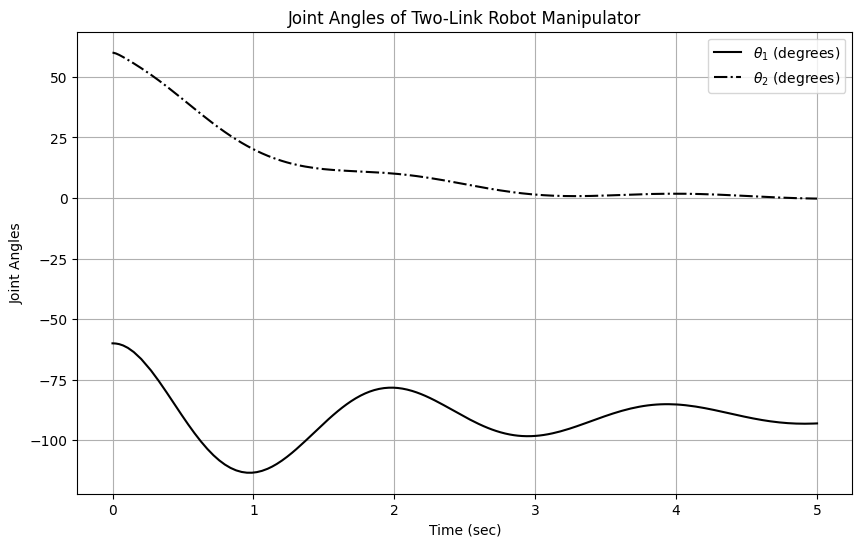

In [3]:
# Simulation parameters
t_span = [0, 5]  # Time span for simulation
x0 = np.array([-np.pi/3, np.pi/3, 0, 0])  # Initial state [theta_1, theta_2, omega_1, omega_2]

# Solve the ODE
sol = solve_ivp(robot_model, t_span, x0, method='RK45')

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0] * 180 / np.pi, 'k', label = r'$\theta_1$ (degrees)')
plt.plot(sol.t, sol.y[1] * 180 / np.pi, '-.k', label = r'$\theta_2$ (degrees)')
plt.xlabel('Time (sec)')
plt.ylabel('Joint Angles')
plt.title('Joint Angles of Two-Link Robot Manipulator')
plt.legend()
plt.grid(True)
plt.show()
